## Hyphotesis ## 

Given the current state of the table and past seasons, what's the realistic probability that each team could still win? 

1. Who is most liskey to win LaLiga this year based on the previous 10 years
2. Who are the 2 teams that will most likely be relegated 
3. Who is the team that will most likely go to conference league

In [1]:
import pandas as pd 

full_data = pd.read_csv("la_liga_data_2014_2025.csv")

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
print(full_data.shape)
full_data.tail(20)

(220, 21)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,last_5
200,1,Real Madrid,6,6,0,0,14,3,11,18,3.00,71524.0,Kylian Mbappé - 7,Thibaut Courtois,NaN,2025,13.5,6.2,7.3,1.22,W W W W W
201,2,Barcelona,5,4,1,0,16,3,13,13,2.60,5787.0,Ferrán Torres - 4,Joan García,NaN,2025,11.6,4.3,7.4,1.48,W W D W W
202,3,Villarreal,6,4,1,1,12,5,7,13,2.17,18023.0,Tajon Buchanan - 3,Luiz Lúcio Reis Júnior,NaN,2025,11.1,5.8,5.3,0.88,W D L W W
203,4,Espanyol,6,3,2,1,10,9,1,11,1.83,28069.0,Pere Milla - 3,Marko Dmitrović,NaN,2025,10.1,7.7,2.4,0.40,D W W L D
204,5,Athletic Club,6,3,1,2,7,7,0,10,1.67,48178.0,"Roberto Navarro, Aitor Paredes... - 1",Unai Simón,NaN,2025,8.5,4.6,3.8,0.64,W W L L D
205,6,Elche,5,2,3,0,7,4,3,9,1.80,27585.0,Rafa Mir - 3,Matías Dituro,NaN,2025,4.8,5.8,-1.0,-0.20,D D W D W
206,7,Betis,6,2,3,1,9,7,2,9,1.50,59880.0,"Pablo Fornals, Cucho - 2","Pau López, Álvaro Vallés",NaN,2025,9.1,5.3,3.7,0.62,W D L D W
207,8,Getafe,5,3,0,2,6,7,-1,9,1.80,8657.0,Adrián Liso - 3,David Soria,NaN,2025,3.8,4.6,-0.8,-0.15,W W L W L
208,9,Valencia,6,2,2,2,8,10,-2,8,1.33,45595.0,Hugo Duro - 3,Julen Agirrezabala,NaN,2025,6.3,9.2,-2.9,-0.48,L W L W D
209,10,Sevilla,6,2,1,3,10,10,0,7,1.17,37391.0,Isaac Romero - 2,Ørjan Nyland,NaN,2025,4.7,9.4,-4.7,-0.78,L W D W L


## Data Exploration ## 

In [4]:
# number of appearances for the past 11 seasons 
# if below 11 then the team was relegated at some point
full_data['squad'].value_counts()

squad
Barcelona          11
Sevilla            11
Real Madrid        11
Valencia           11
Real Sociedad      11
Betis              11
Celta Vigo         11
Athletic Club      11
Villarreal         11
Atlético Madrid    11
Getafe             10
Espanyol            9
Alavés              9
Osasuna             8
Levante             7
Rayo Vallecano      7
Mallorca            6
Girona              6
Granada             6
Eibar               6
Leganés             5
Las Palmas          5
Valladolid          5
Cádiz               4
Elche               4
La Coruña           3
Málaga              3
Sporting Gijón      2
Huesca              2
Almería             2
Oviedo              1
Name: count, dtype: int64

In [5]:
# Top 3 ranking count per team
full_data['squad'].groupby(full_data['rk']).value_counts().head(10)

rk  squad          
1   Barcelona          5
    Real Madrid        5
    Atlético Madrid    1
2   Barcelona          5
    Real Madrid        4
    Atlético Madrid    2
3   Atlético Madrid    6
    Real Madrid        2
    Barcelona          1
    Girona             1
Name: count, dtype: int64

In [10]:

full_data.describe()

,rk,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,season,xg,xga,xgd,xgd/90
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,204.000000,220.000000,180.000000,180.000000,1.800000e+02,180.000000
mean,10.500000,35.045455,12.927273,9.190909,12.927273,45.986364,45.986364,0.000000,47.972727,1.367182,26782.946078,2020.000000,44.204444,44.205556,-7.894919e-17,-0.001167
std,5.779431,9.365619,6.781938,3.663956,6.241281,20.246084,17.481231,24.434985,20.824318,0.480425,17963.782613,3.169489,17.143036,15.484134,1.620687e+01,0.495324
min,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-64.000000,2.000000,0.330000,91.000000,2015.000000,3.300000,4.300000,-3.300000e+01,-1.540000
25%,5.750000,38.000000,9.000000,7.000000,8.750000,36.000000,37.750000,-14.250000,38.750000,1.080000,13727.250000,2017.000000,38.700000,40.150000,-9.450000e+00,-0.292500
50%,10.500000,38.000000,12.000000,9.500000,14.000000,44.500000,49.000000,-4.500000,46.000000,1.260000,20274.500000,2020.000000,43.900000,46.800000,-2.550000e+00,-0.085000
75%,15.250000,38.000000,17.000000,11.250000,17.000000,55.250000,57.000000,9.250000,60.000000,1.630000,37429.250000,2023.000000,53.225000,53.800000,7.475000e+00,0.302500
max,20.000000,38.000000,29.000000,18.000000,30.000000,116.000000,94.000000,83.000000,95.000000,3.000000,83498.000000,2025.000000,91.500000,76.200000,4.950000e+01,1.480000


In [11]:
# Winning teams of the past 10 years 

#filter the dataset for the past 10 years 
#this includes current unfinshed season
winning_teams = full_data[full_data["rk"] == 1][["season", "squad", "pts", "pts/mp", "gd"]].sort_values("season")

# Display the results
print(winning_teams)


     season            squad  pts  pts/mp  gd
0      2015        Barcelona   91    2.39  83
20     2016      Real Madrid   93    2.45  65
40     2017        Barcelona   93    2.45  70
60     2018        Barcelona   87    2.29  54
80     2019      Real Madrid   87    2.29  45
100    2020  Atlético Madrid   86    2.26  42
120    2021      Real Madrid   86    2.26  49
140    2022        Barcelona   88    2.32  50
160    2023      Real Madrid   95    2.50  61
180    2024        Barcelona   88    2.32  63
200    2025      Real Madrid   18    3.00  11


In [12]:
full_data.tail(20)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,last_5
200,1,Real Madrid,6,6,0,0,14,3,11,18,3.00,71524.0,Kylian Mbappé - 7,Thibaut Courtois,NaN,2025,13.5,6.2,7.3,1.22,W W W W W
201,2,Barcelona,5,4,1,0,16,3,13,13,2.60,5787.0,Ferrán Torres - 4,Joan García,NaN,2025,11.6,4.3,7.4,1.48,W W D W W
202,3,Villarreal,6,4,1,1,12,5,7,13,2.17,18023.0,Tajon Buchanan - 3,Luiz Lúcio Reis Júnior,NaN,2025,11.1,5.8,5.3,0.88,W D L W W
203,4,Espanyol,6,3,2,1,10,9,1,11,1.83,28069.0,Pere Milla - 3,Marko Dmitrović,NaN,2025,10.1,7.7,2.4,0.40,D W W L D
204,5,Athletic Club,6,3,1,2,7,7,0,10,1.67,48178.0,"Roberto Navarro, Aitor Paredes... - 1",Unai Simón,NaN,2025,8.5,4.6,3.8,0.64,W W L L D
205,6,Elche,5,2,3,0,7,4,3,9,1.80,27585.0,Rafa Mir - 3,Matías Dituro,NaN,2025,4.8,5.8,-1.0,-0.20,D D W D W
206,7,Betis,6,2,3,1,9,7,2,9,1.50,59880.0,"Pablo Fornals, Cucho - 2","Pau López, Álvaro Vallés",NaN,2025,9.1,5.3,3.7,0.62,W D L D W
207,8,Getafe,5,3,0,2,6,7,-1,9,1.80,8657.0,Adrián Liso - 3,David Soria,NaN,2025,3.8,4.6,-0.8,-0.15,W W L W L
208,9,Valencia,6,2,2,2,8,10,-2,8,1.33,45595.0,Hugo Duro - 3,Julen Agirrezabala,NaN,2025,6.3,9.2,-2.9,-0.48,L W L W D
209,10,Sevilla,6,2,1,3,10,10,0,7,1.17,37391.0,Isaac Romero - 2,Ørjan Nyland,NaN,2025,4.7,9.4,-4.7,-0.78,L W D W L


In [13]:

# Filter for winning teams from the past 10 years, excluding the current season
winning_teams_past_10 = full_data[(full_data["rk"] == 1) & (full_data["season"] < 2025)]

# Compute the average 'pts/mp' for the past 10 winning teams
avg_pts_mp_winners = winning_teams_past_10["pts/mp"].mean()

# Display the result
print(f"Average Pts/MP for past 10 winning teams (excluding this year): {avg_pts_mp_winners:.2f}")

Average Pts/MP for past 10 winning teams (excluding this year): 2.35


In [14]:
# Convert 'rk' to binary (1 if team won the league, 0 otherwise)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

# Filter only championship-winning teams
champions_only = full_data[full_data["is_champion"] == 1]

In [15]:
full_data.head(2)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,last_5,is_champion
0,1,Barcelona,38,29,4,5,112,29,83,91,2.39,74655.0,Luis Suárez - 40,Claudio Bravo,→ Champions League via league finish,2015,NaN,NaN,NaN,NaN,NaN,1
1,2,Real Madrid,38,28,6,4,110,34,76,90,2.37,71265.0,Cristiano Ronaldo - 35,Keylor Navas,→ Champions League via Champions League win,2015,NaN,NaN,NaN,NaN,NaN,0


In [16]:

# Calculate the mean of 'pts/mp' for champions_only
mean_pts_mp = champions_only["pts/mp"].mean()

print(f"Mean of 'pts/mp': {mean_pts_mp:.2f}")

Mean of 'pts/mp': 2.41


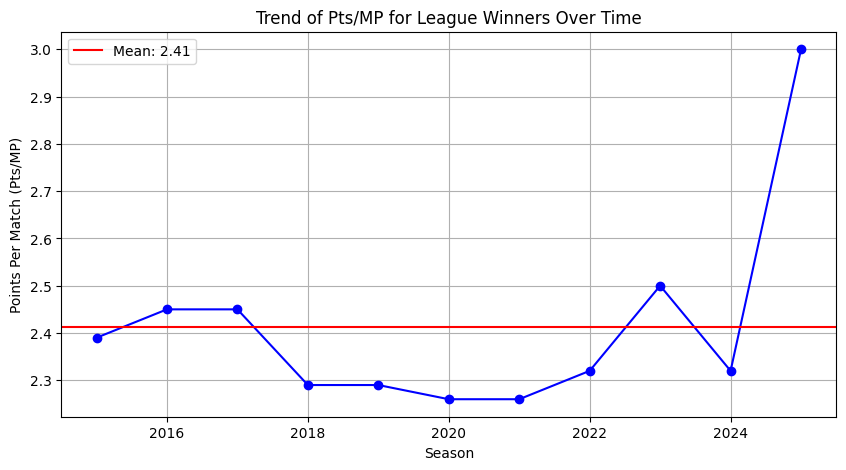

In [17]:

import matplotlib.pyplot as plt

# Plot trend of 'pts/mp' for champions over the years
plt.figure(figsize=(10, 5))
plt.plot(champions_only["season"], champions_only["pts/mp"], marker="o", linestyle="-", color="b")
plt.axhline(y=mean_pts_mp, color='r', linestyle='-', label=f'Mean: {mean_pts_mp:.2f}')
plt.xlabel("Season")
plt.ylabel("Points Per Match (Pts/MP)")
plt.title("Trend of Pts/MP for League Winners Over Time")
plt.grid(True)
plt.legend()
plt.show()

## ML Modeling & Prediction 

In [18]:
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.preprocessing import StandardScaler     # To normalize our features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss  # Model evaluation
from sklearn.model_selection import cross_val_score  # For cross-validation
import pandas as pd                                  # For data manipulation
import numpy as np                           # For numerical operations

In [19]:
# Calculate how many games each team has left to play (La Liga has 38 total games)
full_data["games_left"] = 38 - full_data["mp"]

# Estimate the final number of points if each team keeps their current pace
full_data["projected_pts"] = full_data["pts"] + full_data["games_left"] * full_data["pts/mp"]

# Create a binary column to indicate if a team was champion that season (1 = champion, 0 = not)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

In [20]:

full_data.tail(3)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,last_5,is_champion,games_left,projected_pts
217,18,Real Sociedad,5,0,2,3,5,9,-4,2,0.40,34287.0,"Mikel Oyarzabal, Takefusa Kubo... - 1",Álex Remiro,NaN,2025,5.9,8.9,-3.0,-0.60,D D L L L,0,33,15.20
218,19,Mallorca,5,0,2,3,5,10,-5,2,0.40,20206.0,Vedat Muriqi - 4,Leo Román,NaN,2025,4.4,9.2,-4.8,-0.97,L D L L D,0,33,15.20
219,20,Girona,6,0,2,4,3,16,-13,2,0.33,11585.0,"Azzedine Ounahi, Vladyslav Vanat... - 1",Paulo Gazzaniga,NaN,2025,4.6,13.8,-9.2,-1.54,L L D L D,0,32,12.56


In [21]:
# Define the features (inputs) the model will use
features = ["pts/mp", "gd", "w", "l", "projected_pts"]

# Create training data: all seasons before 2025
df_train = full_data[full_data["season"] < 2025]

# Create testing data: only the 2025 season (current one)
df_test = full_data[full_data["season"] == 2025].copy()

# Define feature matrix (X) and target variable (y)
X_train = df_train[features]
y_train = df_train["is_champion"]
X_test = df_test[features]

In [22]:
# Initialize the model with 200 trees and a fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
# Predict binary outcomes (0 or 1) on training set
train_preds = model.predict(X_train)

# Predict probabilities of being champion
train_probs = model.predict_proba(X_train)[:, 1]  # Only the prob of class 1

In [24]:
# Compute accuracy
accuracy = accuracy_score(y_train, train_preds)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_train, train_probs)

# Compute log loss (lower is better)
logloss = log_loss(y_train, train_probs)

# Print performance metrics
print(f"\nModel Performance on Historical Data")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Log Loss: {logloss:.3f}")

# Print detailed classification performance
print("\nClassification Report:")
print(classification_report(y_train, train_preds))

# Show confusion matrix (true vs predicted values)
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))



Model Performance on Historical Data
Accuracy: 1.000
ROC AUC Score: 1.000
Log Loss: 0.012

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[190   0]
 [  0  10]]


Precision: Out of all the times the model said "yes", how many times was it right?

Recall: Out of all the actual "yes" cases, how many did the model catch?

F1-score: A mix of precision and recall in one number.

Support: The number of actual cases for each class (label) in your data.

Confusion Matrix: A table that shows what the model got right and wrong

In [25]:
# Predict probability of becoming champion
df_test["win_probability"] = model.predict_proba(X_test)[:, 1]

In [26]:
df_test.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,season,xg,xga,xgd,xgd/90,last_5,is_champion,games_left,projected_pts,win_probability
200,1,Real Madrid,6,6,0,0,14,3,11,18,3.00,71524.0,Kylian Mbappé - 7,Thibaut Courtois,NaN,2025,13.5,6.2,7.3,1.22,W W W W W,1,32,114.00,0.690
201,2,Barcelona,5,4,1,0,16,3,13,13,2.60,5787.0,Ferrán Torres - 4,Joan García,NaN,2025,11.6,4.3,7.4,1.48,W W D W W,0,33,98.80,0.690
202,3,Villarreal,6,4,1,1,12,5,7,13,2.17,18023.0,Tajon Buchanan - 3,Luiz Lúcio Reis Júnior,NaN,2025,11.1,5.8,5.3,0.88,W D L W W,0,32,82.44,0.080
203,4,Espanyol,6,3,2,1,10,9,1,11,1.83,28069.0,Pere Milla - 3,Marko Dmitrović,NaN,2025,10.1,7.7,2.4,0.40,D W W L D,0,32,69.56,0.075
204,5,Athletic Club,6,3,1,2,7,7,0,10,1.67,48178.0,"Roberto Navarro, Aitor Paredes... - 1",Unai Simón,NaN,2025,8.5,4.6,3.8,0.64,W W L L D,0,32,63.44,0.075


In [27]:
# Normalize the probabilities so that all teams add up to 100%
df_test["win_probability (%)"] = df_test["win_probability"] / df_test["win_probability"].sum() * 100

# Round the values for better readability
df_test["win_probability (%)"] = df_test["win_probability (%)"].round(3)

In [28]:
# Sort the test DataFrame by win probability descending
df_test = df_test.sort_values("projected_pts", ascending=False)
print("\nChampionship Win Probabilities (2025):")
df_test[["squad", "pts", "projected_pts", "pts/mp", "gd", "games_left", "win_probability (%)"]]


Championship Win Probabilities (2025):


,squad,pts,projected_pts,pts/mp,gd,games_left,win_probability (%)
200,Real Madrid,18,114.00,3.00,11,32,27.165
201,Barcelona,13,98.80,2.60,13,33,27.165
202,Villarreal,13,82.44,2.17,7,32,3.150
203,Espanyol,11,69.56,1.83,1,32,2.953
205,Elche,9,68.40,1.80,3,33,2.953
207,Getafe,9,68.40,1.80,-1,33,2.953
204,Athletic Club,10,63.44,1.67,0,32,2.953
206,Betis,9,57.00,1.50,2,32,2.953
210,Alavés,7,53.20,1.40,0,33,2.953
208,Valencia,8,50.56,1.33,-2,32,2.953


Based on our analysis Real Madrid and Barcelona have the highest chnace of winning at 27%. Our model predicts that Real Madrid will have 114 point, while Barcelona will have 98. Because of this, I say Real Madrid will have a better chance of winning the league. 

The 7th position for conference league will most likely be Athletic Club based on projected points

the relegated teams will most likely be Mallorca and Girona